In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### 데이터셋 다운로드 하고 Dataloader 생성하기

In [2]:
# 데이터셋 다운로드 및 Dataloader 생성 
train_dataset = dataset.FashionMNIST(root="./data", train=True, transform=transforms.ToTensor(),download=True)
test_dataset = dataset.FashionMNIST(root="./data", train=False, transform=transforms.ToTensor(),download=True)

# train Loader test Loader 설정 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = 100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = 1, shuffle=False)

### 모델 정의

In [3]:
class LogisticRegression(nn.Module) : 
    def __init__(self, input_size, num_classes) : 
        super(LogisticRegression, self).__init__() 
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x) : 
        out = self.linear(x)
        return out

### 하이퍼 파라미터 설정 

In [4]:
input_size = 28 * 28
num_classes = 10
num_epochs = 10
lr = 0.001

total_step = len(train_loader)

### 모델, Loss, 옵티마이저 정의

In [5]:
model = LogisticRegression(input_size=input_size, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using Device >>" , device)

model.to(device)

Using Device >> cpu


LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

### train loop

In [6]:
loss_list = []
acc_list = []

for epoch in range(num_epochs) :
    correct = 0
    total = 0 
    for i, (images, labels) in enumerate(train_loader) : 
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        ouptuts = model(images)
        loss = criterion(ouptuts, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0 :
            loss_list.append(loss.item())
            _, predicted = torch.max(ouptuts.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            acc_list.append(correct / total)
            
            print("Epoch [{}/{}], Step [{}/{}], Loss : {:.4f}, Train ACC : {:.4f}".format(
                epoch+1, num_epochs, i+1, total_step, loss.item(), acc_list[-1]))

Epoch [1/10], Step [100/600], Loss : 1.3516, Train ACC : 0.6800
Epoch [1/10], Step [200/600], Loss : 1.1346, Train ACC : 0.6650
Epoch [1/10], Step [300/600], Loss : 0.9726, Train ACC : 0.6700
Epoch [1/10], Step [400/600], Loss : 0.8008, Train ACC : 0.6975
Epoch [1/10], Step [500/600], Loss : 0.8451, Train ACC : 0.7060
Epoch [1/10], Step [600/600], Loss : 0.7684, Train ACC : 0.7150
Epoch [2/10], Step [100/600], Loss : 0.7237, Train ACC : 0.7700
Epoch [2/10], Step [200/600], Loss : 0.7513, Train ACC : 0.7650
Epoch [2/10], Step [300/600], Loss : 0.7417, Train ACC : 0.7600
Epoch [2/10], Step [400/600], Loss : 0.8005, Train ACC : 0.7725
Epoch [2/10], Step [500/600], Loss : 0.7837, Train ACC : 0.7620
Epoch [2/10], Step [600/600], Loss : 0.6955, Train ACC : 0.7700
Epoch [3/10], Step [100/600], Loss : 0.7925, Train ACC : 0.7600
Epoch [3/10], Step [200/600], Loss : 0.6448, Train ACC : 0.7900
Epoch [3/10], Step [300/600], Loss : 0.6251, Train ACC : 0.7867
Epoch [3/10], Step [400/600], Loss : 0.6

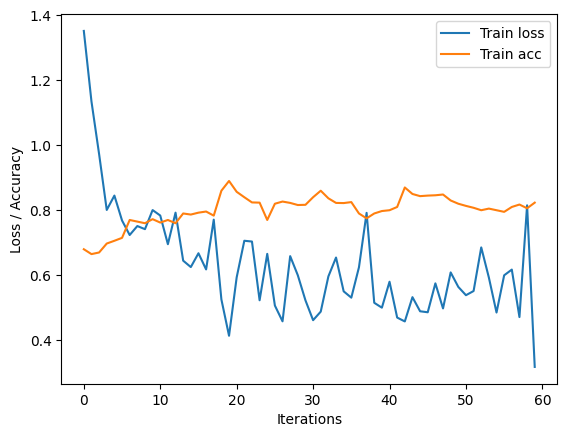

In [7]:
plt.plot(loss_list, label="Train loss")
plt.plot(acc_list, label="Train acc")
plt.xlabel('Iterations')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()